An Eigenfaces Session with python
==========
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [271]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender
       

Populating the interactive namespace from numpy and matplotlib


Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [272]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [273]:
import csv
with open('db/index.csv','r', encoding='utf-8') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [274]:
print(p.len())
p[99].getPicfile()

348


'db/91c.jpg'

Let's create a dataset of the analysis.


'Joan|Tardà i Coma|H'

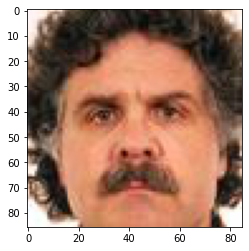

In [275]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 129
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

In [276]:
print(np.shape(I))
I

(86, 85, 3)


array([[[255, 247, 252],
        [252, 243, 246],
        [255, 248, 248],
        ...,
        [255, 234, 220],
        [255, 246, 232],
        [255, 246, 236]],

       [[255, 247, 250],
        [252, 241, 245],
        [255, 244, 244],
        ...,
        [248, 226, 213],
        [255, 241, 229],
        [255, 245, 236]],

       [[255, 246, 249],
        [254, 244, 245],
        [255, 244, 244],
        ...,
        [235, 217, 205],
        [253, 236, 228],
        [255, 248, 240]],

       ...,

       [[254, 252, 255],
        [255, 255, 255],
        [252, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 254, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 253, 255],
        [255, 253, 254],
        [252, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

(86, 85)

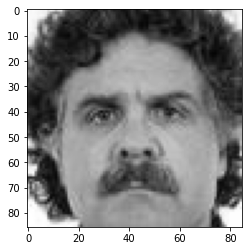

In [277]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)
Is

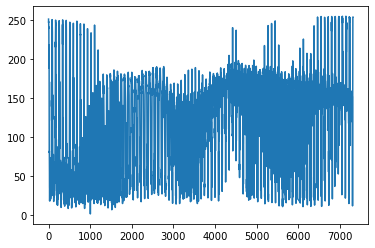

In [278]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables.

In [96]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


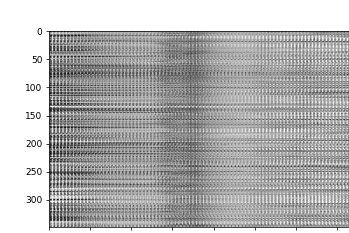

In [97]:
%pylab notebook 
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')

## 1. Compute the mean representative and plot the image corresponding to the mean representative

In [99]:
mX = X.mean(axis=0)
mX.shape

(7310,)

In [100]:
mX.reshape(Is).shape

(86, 85)

<IPython.core.display.Javascript object>


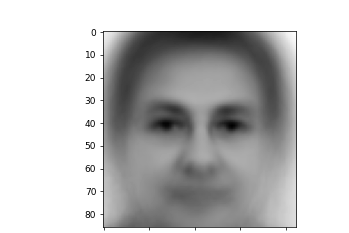

In [101]:
import pylab as pl
pl.figure()
pl.imshow(mX.reshape(Is))
#pl.show()

This is the mean of all the dataset images.

## 2. Compute the standard deviation and plot the corresponding image

In [102]:
sX = X.std(axis=0)
sX.shape

(7310,)

<IPython.core.display.Javascript object>


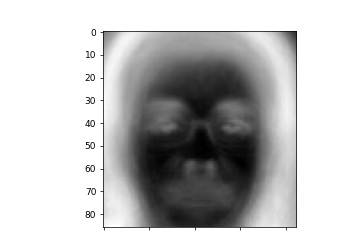

In [103]:
import pylab as pl
pl.figure()
pl.imshow(sX.reshape(Is))
#pl.show()

As can be seen, the whiter regions are the pixels that presents more differences between the images. Those zones are related to the fact that wear glasses or not, the length of the hair, the fact to habe moustache or not, the density of the eyebrows...

### Cluster = 2

Now we are going to fit a kmeans with 2 clusters. The idea is to see if the algorithm is able to cluster the (in principle) two major separable groups: males and females.

In [104]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 2)
k_means.fit(X)

KMeans(n_clusters=2)

In [105]:
k_means.cluster_centers_.shape

(2, 7310)

Centroid 1 seems to be related with the females and centroid 0 with the males.

<IPython.core.display.Javascript object>


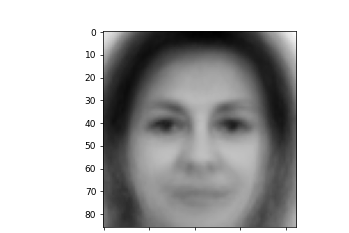

In [108]:
pl.figure()
pl.imshow(k_means.cluster_centers_[1,:].reshape(Is))

<IPython.core.display.Javascript object>


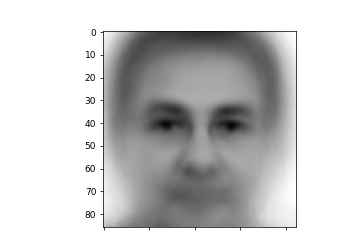

In [109]:
pl.figure()
pl.imshow(k_means.cluster_centers_[0,:].reshape(Is))

## 3. Run a k-means clustering and split the representatives' data into 10 groups. Plot the full set of images for two groups of your choice.

### Cluster = 10

In [123]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 10)
k_means.fit(X)

KMeans(n_clusters=10)

Now we are going to extract the chambers of representative for the second and first clusters (counting from 0) and then we will plot their faces.

In [128]:
cluster2 = np.where(k_means.labels_ == 2)[0]
cluster3 = np.where(k_means.labels_ == 1)[0]
print(cluster2.shape)
print(cluster3.shape)

(28,)
(48,)


Cluster 2 faces:

<IPython.core.display.Javascript object>


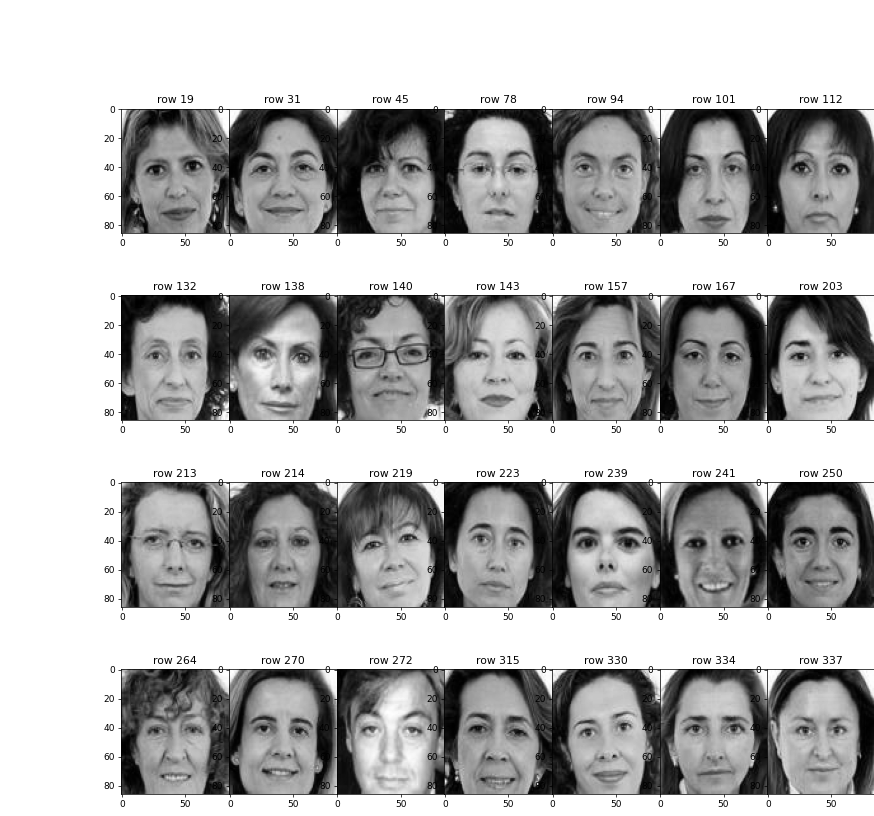

In [126]:
fig, axs = plt.subplots(4,7, figsize=(15, 14), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(len(cluster2)):
    #print(cluster2[i])
    axs[i].imshow(X[cluster2[i],:].reshape(Is), aspect="auto")
    axs[i].set_title("row " + str(1+cluster2[i]))

It seems that cluster 2 look at:
- woman's gender faces
- faces with many dark areas around the face (hair mainly). In the unique man's case, it is due to a black background.

Cluster 3:

<IPython.core.display.Javascript object>


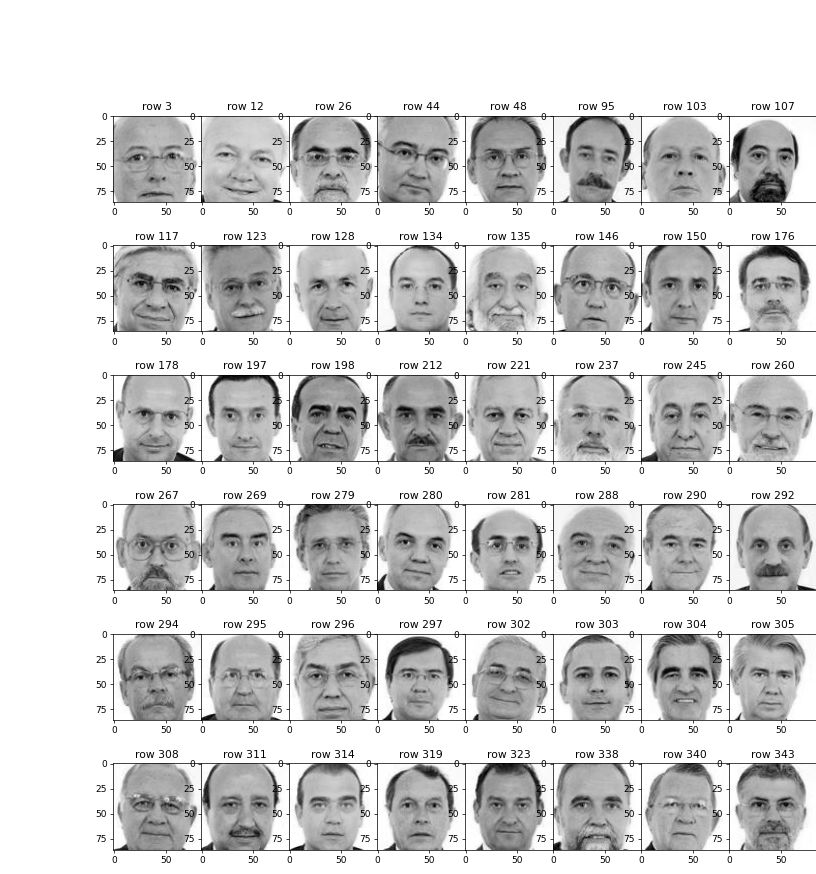

In [130]:
fig, axs = plt.subplots(6,8, figsize=(14, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(len(cluster3)):
    #print(cluster3[i])
    axs[i].imshow(X[cluster3[i],:].reshape(Is), aspect="auto")
    axs[i].set_title("row " + str(1+cluster3[i]))

It seems that cluster 1 look at:
- men's gender faces
- faces with few dark areas, where very light tones predominate
- faces with little hair or hair without mane
- faces where the white background has an important number of the image pixels.

## 4. Plot the centroid corresponding to each k-means cluster (10 images corresponding to the mean of each cluster)

In [131]:
k_means.cluster_centers_.shape

(10, 7310)

The nexts are the 10 centroids of the 10 clusters we have built.

<IPython.core.display.Javascript object>


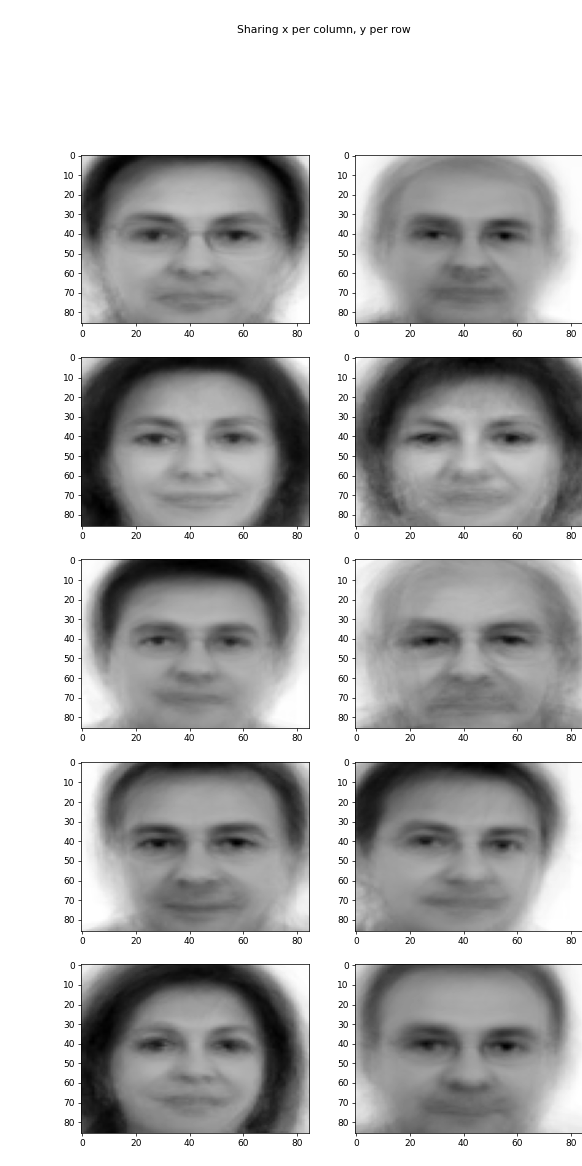

In [132]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(5, 2, figsize = (10,20))
fig.suptitle('Sharing x per column, y per row')
ax0.imshow(k_means.cluster_centers_[0,:].reshape(Is), aspect="auto")
ax1.imshow(k_means.cluster_centers_[1,:].reshape(Is), aspect="auto")
ax2.imshow(k_means.cluster_centers_[2,:].reshape(Is), aspect="auto")
ax3.imshow(k_means.cluster_centers_[3,:].reshape(Is), aspect="auto")
ax4.imshow(k_means.cluster_centers_[4,:].reshape(Is), aspect="auto")
ax5.imshow(k_means.cluster_centers_[5,:].reshape(Is), aspect="auto")
ax6.imshow(k_means.cluster_centers_[6,:].reshape(Is), aspect="auto")
ax7.imshow(k_means.cluster_centers_[7,:].reshape(Is), aspect="auto")
ax8.imshow(k_means.cluster_centers_[8,:].reshape(Is), aspect="auto")
ax9.imshow(k_means.cluster_centers_[9,:].reshape(Is), aspect="auto")


## 5. Fit a PCA model of the dataset.

Before applying the PCA we have to scale the data, as PCA is affected by different scales of the values beeing more affected by the higher values than the lower ones. Scale means substract to each value the mean and dividing by the standard deviation so all the values will have mean equal 0 and the same variance. 

In [181]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

sX = preprocessing.scale(X)
sX.shape

(348, 7310)

We will fit a PCA and we only keep the first 5 components, as the rest explain a very very low proportion of tha variance of our data:

In [172]:
mod = PCA(n_components = 5)
mod.fit(sX)

PCA(n_components=5)

In [173]:
mod.explained_variance_ratio_

array([0.2136283 , 0.08746378, 0.07299065, 0.0517424 , 0.04674383])

In [174]:
T = mod.transform(sX)

In [175]:
T.shape

(348, 5)

## 6. Build a 2D score plot with the projections of the representatives onto the PCA plane

Now we are going to plot in 2 dimensions the first two principal components. If we colour the plot by gender, we can see that higher values of first principal component (right side of the image) are related to male gender, while lower values of the first principal component are more related to woman.

<IPython.core.display.Javascript object>


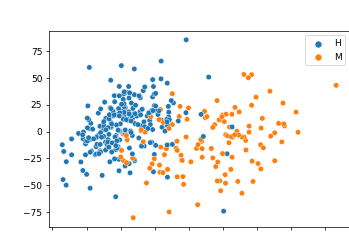

C:\Users\Oli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

In [176]:
pl.figure()
import seaborn as sns 
sns.scatterplot(T[:,0],T[:,1], hue=Yg)

## 7. Plot the first three eigenvectors (principal components, PCs) projection vectors

In [143]:
mod.components_.shape

(5, 7310)

In [144]:
mod.components_.reshape((5, Is[0], Is[1])).shape

(5, 86, 85)

In [145]:
e = mod.components_.reshape((5, Is[0], Is[1]))

<IPython.core.display.Javascript object>


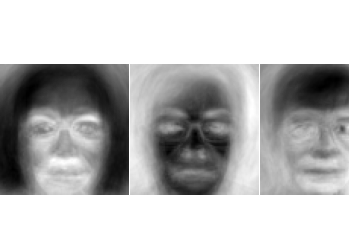

In [146]:
pl.figure()
pl.subplot(131) # 1x3 and the position 1
pl.imshow(e[0])
pl.axis("off")

pl.subplot(132) # 1x3 and the position 2
pl.imshow(e[1])
pl.axis("off")

pl.subplot(133) # 1x3 and the position 3
pl.imshow(e[2])
pl.axis("off")

pl.subplots_adjust(wspace = 0.01, hspace=0.01,
                  top = 1, bottom = 0, left = 0, right = 1)

pl.show()

## 8. Plot the amount of variance explained by each PCs

In [147]:
mod.explained_variance_ratio_

array([0.2136283 , 0.08746378, 0.07299065, 0.0517424 , 0.04674383])

In [153]:
import pandas as pd
expl_var_df = pd.DataFrame([mod.explained_variance_ratio_],
                   columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
#expl_var_df
print(expl_var_df.to_string(index=False))

 Component 1  Component 2  Component 3  Component 4  Component 5
    0.213628     0.087464     0.072991     0.051742     0.046744


<IPython.core.display.Javascript object>


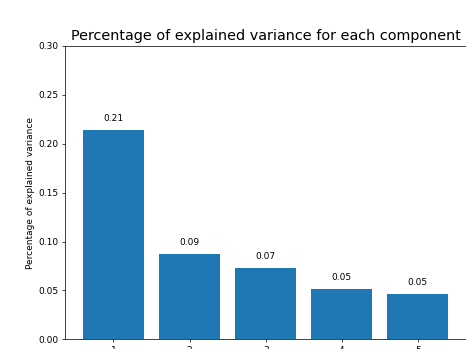

Text(0, 0.5, 'Percentage of explained variance')

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.bar(
    x      = np.arange(mod.n_components_) + 1,
    height = mod.explained_variance_ratio_
)

for x, y in zip(np.arange(len(expl_var_df.columns)) + 1, mod.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(mod.n_components_) + 1)
ax.set_ylim(0, 0.3)
ax.set_title('Percentage of explained variance for each component', size=16)
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of explained variance')

Now we are going to plot the accumulated percentage of variance explained.

In [161]:
cum_expl_var_df = pd.DataFrame([mod.explained_variance_ratio_.cumsum()],
                   columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])

print(cum_expl_var_df.to_string(index=False))

 Component 1  Component 2  Component 3  Component 4  Component 5
    0.213628     0.301092     0.374083     0.425825     0.472569


<IPython.core.display.Javascript object>


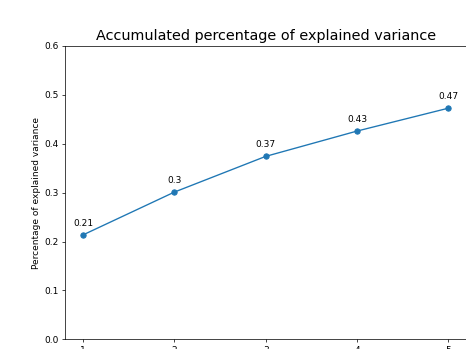

Text(0, 0.5, 'Percentage of explained variance')

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(
    np.arange(mod.n_components_) + 1,
    mod.explained_variance_ratio_.cumsum(),
    marker = 'o'
)

for x, y in zip(np.arange(mod.n_components_) + 1, mod.explained_variance_ratio_.cumsum()):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 0.6)
ax.set_xticks(np.arange(mod.n_components_) + 1)
ax.set_title('Accumulated percentage of explained variance', size=16)
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of explained variance')

## 9. Train a gender predictor  with the class of representatives. Which performance can you get on predicting gender from the images? Provide metrics.

The classifier I have chosen to apply to the data is the random forest. The random forest are an ensemble learning method (because it constructs a lot of decision trees) used for both classification and regression problems. 
We will work with the non normalized data as random forest doesn't need it because the algorithm is not based in computing any kind of euclidean distance.
First of all we will have a look at the dimensions of out structures.

In [322]:
print(X.shape)
print(Yg.shape)
print(Yp.shape)
print(X[0:5,])
print(Yg[0:5])
print(Yp[0:5])

(348, 7310)
(348,)
(348,)
[[251.33333333 251.33333333 243.66666667 ... 255.         255.
  255.        ]
 [252.66666667 253.66666667 254.66666667 ... 144.33333333 109.66666667
  111.66666667]
 [252.         251.66666667 252.66666667 ... 255.         255.
  255.        ]
 [236.         235.         240.33333333 ...   3.           4.
    4.        ]
 [250.         250.33333333 252.         ... 255.         255.
  255.        ]]
['H' 'M' 'H' 'H' 'H']
['GS' 'GS' 'GC-CiU' 'GP' 'GP']


Now we are going to plit sX and Yg into training and testing datasets. As we don't have so many examples (348), we only will put a 20% of the observations in the test or validation set, while the other 80% will be used to train the model doing cross validation and search the optimum hyperparameters.

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Yg, test_size=0.2, random_state=111)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 7310)
(70, 7310)
(278,)
(70,)


First of all we want to know if the problem is balanced (more or less the same number of instances per class) or imbalanced.

In [324]:
Yg_df = pd.DataFrame(Yg)
counts = Yg_df.value_counts()
counts

H    223
M    125
dtype: int64

The dataset is imbalanced (36% of the cases are womans and the 64% rest are men) but there is not an enough desproportion of gender cases to be able to take measures as create synthetic data or remove some observations with the intention to have the exact same proportion of cases.

In this case we have a balanced dataset.

We will fit a random forest classifier to our data. We will tune the most important hyperparameters of the classifier by doing a cross validated randomized grid search, so the classifier will randomly select a combination of different hyperparameters n_iter times (in this case 100 combinations) and for each model fitted (for each combination of hyperparameters) we will apply a 5-fold cross validation in order to obtain a less biased estimator and reduce the chance of overfitting. The most important parameters to tune are:

- n_estimators: the number of trees in the random forest.
- max_features: the size of the random subsets of features to consider when splitting a node.
- max_depth: Maximum number of levels in a tree.
- min_samples_split: Minimum number of samples required to split a node.
- min_samples_leaf: Minimum number of samples required at each leaf node
- bootstrap: False if we use all the datapoints or True if random samples of our data are used.

In [325]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

The best parameters to apply to the classifier from fitting the random search are:

In [326]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [327]:
rf_random_best = rf_random.best_estimator_

The vector corresponding to the prediction labels of the test (holdout) dataset is the following:

In [328]:
yhat = rf_random_best.predict(X_test)
yhat

array(['H', 'M', 'H', 'M', 'M', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'H',
       'M', 'H', 'M', 'M', 'H', 'H', 'M', 'M', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'M', 'H', 'H', 'H', 'H', 'H', 'M', 'H', 'M',
       'H', 'M', 'M', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'H',
       'H', 'H', 'H', 'H', 'M'], dtype='<U1')

Once the model is fitted with the training dataset and the predictions over the holdout dataset are done, is time to see how good or bad our model behaves, comparing the predictions to the real holdout dataset values.

In this case, because of the data is more or less balanced our metric will be the accuracy, so the percentage of good predictions our model does.

In the confusion matrix below it can be seen that the classifier behaves really good on the holdout dataset, only failing in classify 7 datapoints, 4 of them as a class equal to H when it really belongs to class M and 3 of them as M when they really are H.

[[40  3]
 [ 4 23]]


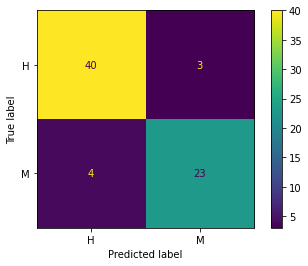

In [329]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, yhat))
metrics.plot_confusion_matrix(rf_random, X_test, y_test)

In [330]:
acc = rf_random_best.score(X_test,y_test)
acc

0.9

The classifier has an accuracy of 90%, meaning that predict the correct class almost every time (90 times out of 100).

## 10. Do the same with the label containing political party of the representatives. Discuss the results. 

Now we are going to apply the same kind of algorithm (random forest) but choosing the political party as the target. The steps will be the same so in order to be brief I will coment only the final results.

First of all we want to know if the problem is balanced (more or less the same number of instances per class) or imbalanced.

In [331]:
Yp_df = pd.DataFrame(Yp)
counts = Yp_df.value_counts()
counts

GS            164
GP            146
GC-CiU         10
GER-ERC         8
GV              7
GMx             5
GIV-IU-ICV      5
GCC             3
dtype: int64

Here we are facing an imbalanced multiclass classification problem. There are groups with many many more instances than others so the classifier will have troubles to detect and predict well the smallest classes. For now we will do the classifier with the raw imbalanced dtaset and see the results.

Split X and Yp into training and testing datasets:

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, Yp, test_size=0.2, random_state=111)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 7310)
(70, 7310)
(278,)
(70,)


Fit the random forest classifier:

In [333]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_party = RandomForestClassifier()
rf_party_random = RandomizedSearchCV(estimator = rf_party, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_party_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Oli\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [334]:
rf_party_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [335]:
rf_party_random_best = rf_party_random.best_estimator_

In [336]:
yhat_party = rf_party_random_best.predict(X_test)
yhat_party

array(['GS', 'GS', 'GS', 'GS', 'GS', 'GP', 'GP', 'GS', 'GS', 'GS', 'GS',
       'GS', 'GP', 'GP', 'GP', 'GP', 'GS', 'GS', 'GP', 'GP', 'GS', 'GP',
       'GS', 'GP', 'GP', 'GS', 'GS', 'GS', 'GP', 'GP', 'GS', 'GS', 'GS',
       'GS', 'GP', 'GS', 'GP', 'GS', 'GS', 'GP', 'GP', 'GP', 'GS', 'GS',
       'GP', 'GS', 'GP', 'GS', 'GP', 'GS', 'GP', 'GP', 'GP', 'GP', 'GS',
       'GP', 'GP', 'GS', 'GS', 'GS', 'GP', 'GS', 'GS', 'GS', 'GP', 'GS',
       'GS', 'GP', 'GS', 'GS'], dtype='<U10')

[[ 0  0  0  1  1  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0 20 11  0]
 [ 0  0  0  8 25  0]
 [ 0  0  0  1  0  0]]


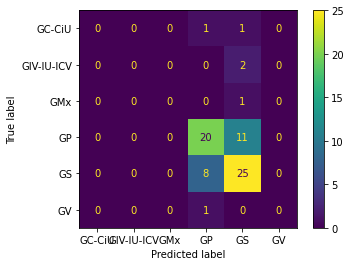

In [337]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, yhat_party))
metrics.plot_confusion_matrix(rf_party_random, X_test, y_test)

In [338]:
acc = rf_party_random_best.score(X_test,y_test)
acc

0.6428571428571429

As we can see, the performance of our classifier is not so good, because the model classify the less populated classes (GC-CiU, GIV-IU-IVC, GMx AND gv) as the majority class in the training set (GS), that's because the classifier doesn't have enough samples of these classes.
This being said, we can see that the classifier does not do a great job even classifying the two biggest classes (GS and GP), classifying correctly 45 out of the 64 instances of those two groups (only 70% of the cases are correctly classified).
We could say that the face of the people is not a strong evidence of its political party.

# Bonus questions:

## 1. Use the model you have built in 9 to predict the gender of your fellow class (dataset provided below). Discuss the results.

To be able to do the same image loading process as in the case of chamber of representatives images, I have renamed the images and put it all in th esame directory. Also I have created by has the csv with all the class image's information (except the one corresponding to Mugnier Gaëlle, which I'm not be able to open).

Also, I have created the classes 'Student' and 'Classroom' that inherits from Diputado and Parlament respectively classes to take advantage of the already written code.

In [261]:
class Student(Diputado):
  pass

class Classroom(Parlament):
  pass

In [262]:
with open('classdb/index.csv','r', encoding='utf-8') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Classroom()
    for row in r:
        n = Student(int(row[0]),"classdb/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        #n.setParty(row[4].strip())
        p.add(n)


In [263]:
print(p.len())
p[22].getPicfile()

31


'classdb/24c.jpg'

To check if it works, I'm going to plot my own picture:

In [1]:
#%matplotlib inline
#idip = 14
#I = pl.imread(p[idip].getPicfile())
#pl.imshow(I)
#np.shape(I)
#'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

In [265]:
print(np.shape(I))
I

(86, 85, 3)


array([[[192, 187, 183],
        [191, 186, 182],
        [191, 186, 182],
        ...,
        [197, 187, 178],
        [195, 185, 175],
        [167, 157, 147]],

       [[187, 182, 178],
        [187, 182, 178],
        [187, 182, 178],
        ...,
        [196, 186, 177],
        [194, 184, 174],
        [166, 156, 146]],

       [[186, 181, 177],
        [186, 181, 177],
        [186, 181, 177],
        ...,
        [194, 185, 176],
        [193, 183, 173],
        [166, 153, 144]],

       ...,

       [[ 76,  68,  57],
        [ 39,  34,  28],
        [ 35,  36,  31],
        ...,
        [ 33,  29,  26],
        [ 35,  31,  30],
        [ 64,  59,  65]],

       [[ 75,  67,  56],
        [ 36,  31,  25],
        [ 33,  34,  29],
        ...,
        [ 34,  30,  27],
        [ 34,  30,  29],
        [ 62,  57,  63]],

       [[ 79,  71,  60],
        [ 35,  30,  24],
        [ 30,  31,  26],
        ...,
        [ 34,  30,  27],
        [ 34,  30,  29],
        [ 61,  56,  62]]

In [266]:
X_class=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])

Yg_class=np.array([ d.getGender() for d in p])

print(Yg_class[0:5])
print(X_class.shape)

['M' 'H' 'M' 'H' 'H']
(31,)


C:\Users\Oli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


The Array X_class is en array of arrays (not a 2d array as X from diputados is) and that's because some of the images have more pixels than the others.

In [270]:
X_class.shape

(31,)

Now we are going to proceed to see which images have different number of pixels than we need (we have 85x86 images so 7310 pixels, that's the length of each row of X_class matrix).
We find out that pictures 5, 11, 13, 17, 18, 26, 27 and 29 have different number of pixels. We will remove them from out X_class and Yg_class arrays and we will work with the rest of pictures.
Then we will stack the array of arrays to have a 2d array

In [290]:
for i in range(0, len(X_class)):
    print(X_class[i,].shape)

(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(5934,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(5418,)
(7310,)
(5525,)
(7310,)
(7310,)
(7310,)
(29415,)
(7225,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7225,)
(5676,)
(7310,)
(5762,)
(7310,)


In [295]:
X_class = X_class[[0,1,2,3,4,6,7,8,9,10,12,14,15,16,19,20,21,22,23,24,25,28,30]]
Yg_class = Yg_class[[0,1,2,3,4,6,7,8,9,10,12,14,15,16,19,20,21,22,23,24,25,28,30]]

In [339]:
for i in range(0, len(X_class)):
    print(X_class[i,].shape)

(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)
(7310,)


In [340]:
X_class = np.stack(X_class)
X_class.shape

(23, 7310)

Now we are going to predict the X matrix with the pixels of the students:

In [341]:
yhat_class = rf_random_best.predict(X_class)
yhat_class

array(['H', 'H', 'H', 'H', 'M', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'H',
       'M', 'M', 'H', 'M', 'M', 'H', 'H', 'H', 'M', 'M'], dtype='<U1')

[[9 7]
 [4 3]]


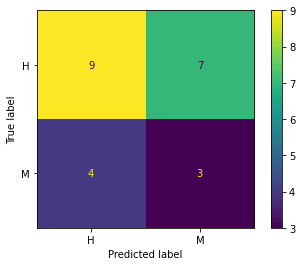

In [342]:
# Print the confusion matrix
print(metrics.confusion_matrix(Yg_class, yhat_class))
metrics.plot_confusion_matrix(rf_random, X_class, Yg_class)

In [344]:
acc = rf_random_best.score(X_class, Yg_class)
acc

0.5217391304347826

The classifier built in exercise 9 really does a very very bad prediction of the students images (only is right in the 52% of the cases). This can be due to various factors:
- the classifier is built with faces of people between 40 to 60 years old, so the faces have attributes very different than the students ones (around 20 to 30 years old).
- The images used to build the classifier are more homogeneous in terms of quality of the image, the faces are different but the photo is taken in the same circumstances (the background of the image, the size of the face relative to the image, etc). By the other side, the student's images are taken by different cameras and in different situations, so the images are more heterogeneous: there are faces more bigger than others, images that shows even the chest of the student, etc. There is even a male student that has a female photo. 

## 2. Build a prediction model capable to discriminate the chamber of representatives images vs the student's class images. Provide metrics.

To be able to build a classifier that discriminate between chamber of representatives and students, we need to build the dataset (concatenating the characteristics of both groups) as well as the target (creating a binary variable that is 0 for chamber of representatives instances and 1 for students ones): 

In [353]:
X_tot = np.concatenate((X, X_class), axis=0)
Yg_tot = np.concatenate((np.zeros(X.shape[0]), np.ones(X_class.shape[0])))
print(X_tot.shape)
print(Yg_tot.shape)

(371, 7310)
(371,)


Now we are going to split between train and test samples as before:

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X_tot, Yg_tot, test_size=0.2, random_state=111)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 7310)
(75, 7310)
(296,)
(75,)


In [355]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_tot = RandomForestClassifier()
rf_tot_random = RandomizedSearchCV(estimator = rf_tot, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_tot_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

The parameters tan best fit our data are:

In [357]:
rf_tot_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [358]:
rf_tot_random_best = rf_tot_random.best_estimator_

Now we are going to do the predictions with the best hyperparameter tunned classifier and compute the metric (accuracy and confusion matrix)

In [359]:
yhat_tot = rf_tot_random_best.predict(X_test)
yhat_tot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

[[74  0]
 [ 0  1]]


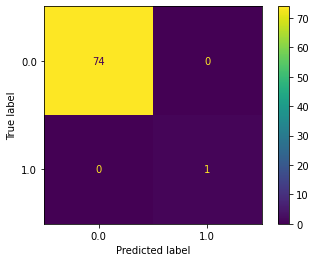

In [360]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, yhat_tot))
metrics.plot_confusion_matrix(rf_tot_random, X_test, y_test)

In [362]:
acc = rf_tot_random_best.score(X_test,y_test)
acc

1.0

As we can see, our classifier classifies all the images correct, but this can be due to the fact that there are a very big proportion of chamber of representatives images.
Only to verify that random forest is able to distinguish so well between the two groups, we are going to create a new dataset were the instances are balanced (same number of instances for each group) and see if the classifier behaves good.

In [365]:
X_tot2 = np.concatenate((X[0:23,], X_class), axis=0)
Yg_tot2 = np.concatenate((np.zeros(X[0:23,].shape[0]), np.ones(X_class.shape[0])))
print(X_tot2.shape)
print(Yg_tot2.shape)

(46, 7310)
(46,)


In [366]:
X_train, X_test, y_train, y_test = train_test_split(X_tot2, Yg_tot2, test_size=0.2, random_state=111)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36, 7310)
(10, 7310)
(36,)
(10,)


In [367]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_tot2 = RandomForestClassifier()
rf_tot2_random = RandomizedSearchCV(estimator = rf_tot2, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_tot2_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [368]:
rf_tot2_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [369]:
rf_tot2_random_best = rf_tot2_random.best_estimator_

In [370]:
yhat_tot2 = rf_tot2_random_best.predict(X_test)
yhat_tot2

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 0.])

[[3 1]
 [1 5]]


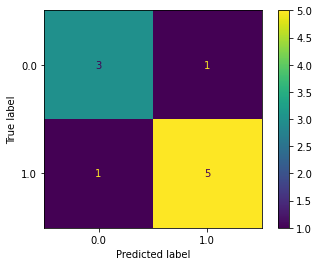

In [371]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, yhat_tot2))
metrics.plot_confusion_matrix(rf_tot2_random, X_test, y_test)

In [372]:
acc = rf_tot2_random_best.score(X_test,y_test)
acc

0.8

When the two classes are balanced the classifier doen not be able to do a perfect job like before, but the classifier doen not classify bad because only missclassify two instances (the 20% of instances of the validation set), one of each class. Maybe if we were able to put more instances of both groups the classifier would perform better.

## 3. With the PCA model, being \(e_1 \) and \(e_2 \) the fist and second eigenvector. Reconstruct a synthetic  image generated on the PCA plane  \( \vec I = \mu + A \cdot \vec e_1 + B \cdot \vec e_2 \), where A and B are two scalars. Build an interactive plot that generates the reconstructed image from A and B through two sliders.